## Parte 2: Implementação Manual do Algoritmo CRC

In [1]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        if mensagem_aumentada[i] == '1':
            inicio = i
            fim = i + len(gerador_bits)

            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
#          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

Teste do Código

In [2]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


## Parte 3: Análise Comparativa de Desempenho 

A linha de código abaixo só funciona se executada no ambiente do VSC.

In [ ]:
pip install crc

In [4]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16 

# Funções calcular_crc_manual e xor_bits já definidas acima, basta rodar o código.

# SCRIPT DE TESTE E MEDIÇÃO DE DESEMPENHO
# Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000, 4500, 9000, 16000]

# O gerador G(x) para CRC-16/MODBUS tem 17 bits (grau 16)
gerador_crc16 = "11000000000000101" 

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)
    
    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_manual = calcular_crc_manual(mensagem_bits, gerador_crc16)
    
    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_manual = end_time - start_time
    
    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_lib = calculator_lib.checksum(mensagem_bytes)
    
    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_lib = end_time - start_time
    
    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("\n--- Resultados Finais ---")
print(resultados)


Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 4500 bytes...
Analisando para mensagem de 9000 bytes...
Analisando para mensagem de 16000 bytes...

--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.182991800000309, 'mem_pico_manual': 105.7509765625, 'tempo_lib': 0.06618969999908586, 'mem_pico_lib': 4.06640625}, {'tamanho': 3000, 'tempo_manual': 0.36531839999952354, 'mem_pico_manual': 211.2431640625, 'tempo_lib': 0.1274943999997049, 'mem_pico_lib': 1.21875}, {'tamanho': 4500, 'tempo_manual': 0.5344396000000415, 'mem_pico_manual': 316.6884765625, 'tempo_lib': 0.20518649999939953, 'mem_pico_lib': 1.21875}, {'tamanho': 9000, 'tempo_manual': 1.0792421999976796, 'mem_pico_manual': 633.1181640625, 'tempo_lib': 0.38431560000026366, 'mem_pico_lib': 1.21875}, {'tamanho': 16000, 'tempo_manual': 1.932348099999217, 'mem_pico_manual': 1125.2822265625, 'tempo_lib': 0.6729793999984395, 'mem_pico_lib': 1.21875}]


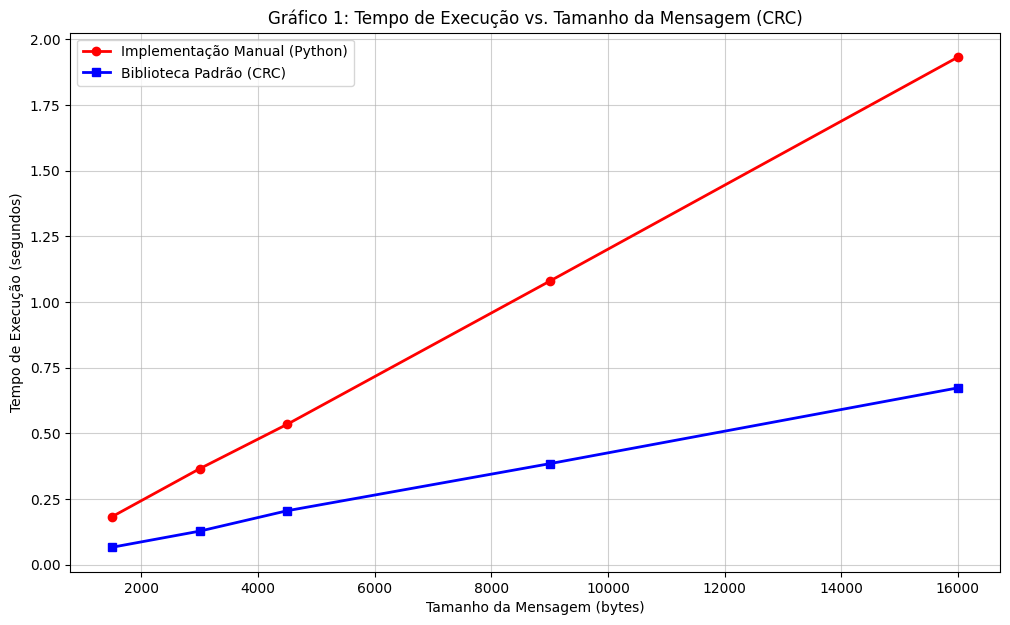

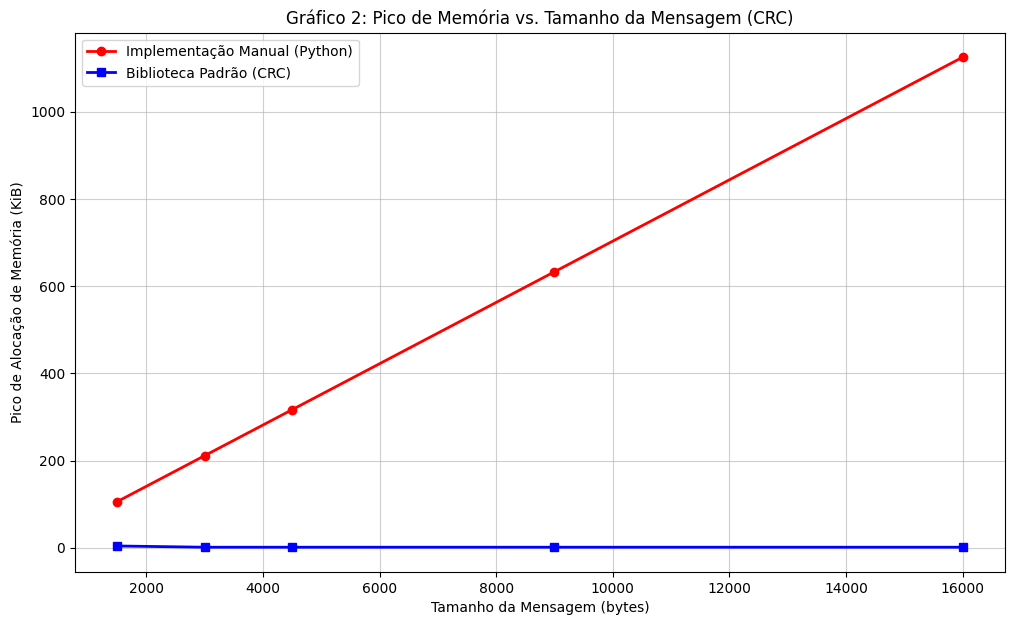

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Dados obtidos na saída da execução do script acima
resultados = [
    {'tamanho': 1500, 'tempo_manual': 0.182991800000309, 'mem_pico_manual': 105.7509765625, 'tempo_lib': 0.06618969999908586, 'mem_pico_lib': 4.06640625}, 
    {'tamanho': 3000, 'tempo_manual': 0.36531839999952354, 'mem_pico_manual': 211.2431640625, 'tempo_lib': 0.1274943999997049, 'mem_pico_lib': 1.21875}, 
    {'tamanho': 4500, 'tempo_manual': 0.5344396000000415, 'mem_pico_manual': 316.6884765625, 'tempo_lib': 0.20518649999939953, 'mem_pico_lib': 1.21875}, 
    {'tamanho': 9000, 'tempo_manual': 1.0792421999976796, 'mem_pico_manual': 633.1181640625, 'tempo_lib': 0.38431560000026366, 'mem_pico_lib': 1.21875}, 
    {'tamanho': 16000, 'tempo_manual': 1.932348099999217, 'mem_pico_manual': 1125.2822265625, 'tempo_lib': 0.6729793999984395, 'mem_pico_lib': 1.21875}
]

# Extração dos dados para plotagem
tamanhos = np.array([r['tamanho'] for r in resultados])
tempos_manual = np.array([r['tempo_manual'] for r in resultados])
tempos_lib = np.array([r['tempo_lib'] for r in resultados])
mem_pico_manual = np.array([r['mem_pico_manual'] for r in resultados])
mem_pico_lib = np.array([r['mem_pico_lib'] for r in resultados])


# Gráfico 1: Tempo de Execução x Tamanho da Mensagem (y)
plt.figure(figsize=(12, 7))
plt.plot(tamanhos, tempos_manual, 'o-', label='Implementação Manual (Python)', color='red', linewidth=2)
plt.plot(tamanhos, tempos_lib, 's-', label='Biblioteca Padrão (CRC)', color='blue', linewidth=2)

plt.title('Gráfico 1: Tempo de Execução vs. Tamanho da Mensagem (CRC)')
plt.xlabel('Tamanho da Mensagem (bytes)')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()



# Gráfico 2: Pico de Memória x Tamanho da Mensagem (y)
plt.figure(figsize=(12, 7))
plt.plot(tamanhos, mem_pico_manual, 'o-', label='Implementação Manual (Python)', color='red', linewidth=2)
plt.plot(tamanhos, mem_pico_lib, 's-', label='Biblioteca Padrão (CRC)', color='blue', linewidth=2)

plt.title('Gráfico 2: Pico de Memória vs. Tamanho da Mensagem (CRC)')
plt.xlabel('Tamanho da Mensagem (bytes)')
plt.ylabel('Pico de Alocação de Memória (KiB)')
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

OBS: A máquina que executou o código foi um processador i5-10400f rodando o SO Windows 11.

## Parte 4: Análise Investigativa da Detecção de Erros (Cenário Personalizado)